In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [78]:
data_path = '../../data/postprocessed/PC/'

mapping_table = {
    'backprop': 'Backpropagation algorithm',
    'gaussian': 'Gaussian Elimination',
    'gpu': 'Stream Cluster',
    'lenet': 'Lenet5',
    'gpuburn': 'GPU-burn'
}

data_sheet = pd.DataFrame()
for csv_name in [file for file in os.listdir(data_path) if file.endswith('_telemetry.csv') and not file.startswith('srad')]:
    csv_full_path = os.path.join(data_path, csv_name)
    print(csv_full_path)
    df = pd.read_csv(csv_full_path)
    df['Range'] = int(csv_name.split('_')[1].split('_')[0])
    df['App_name'] = mapping_table[csv_name.split('_')[0]]

    data_sheet=pd.concat([data_sheet, df], ignore_index=True)

../../data/postprocessed/PC/backprop_50_telemetry.csv
../../data/postprocessed/PC/gaussian_10_telemetry.csv
../../data/postprocessed/PC/gaussian_15_telemetry.csv
../../data/postprocessed/PC/gpuburn_15_telemetry.csv
../../data/postprocessed/PC/backprop_20_telemetry.csv
../../data/postprocessed/PC/gpuburn_20_telemetry.csv
../../data/postprocessed/PC/lenet_50_telemetry.csv
../../data/postprocessed/PC/gpuburn_100_telemetry.csv
../../data/postprocessed/PC/gpuburn_3_telemetry.csv
../../data/postprocessed/PC/gpuburn_50_telemetry.csv
../../data/postprocessed/PC/lenet_30_telemetry.csv
../../data/postprocessed/PC/lenet_7_telemetry.csv
../../data/postprocessed/PC/lenet_80_telemetry.csv
../../data/postprocessed/PC/gaussian_5_telemetry.csv
../../data/postprocessed/PC/lenet_20_telemetry.csv
../../data/postprocessed/PC/gaussian_20_telemetry.csv
../../data/postprocessed/PC/gpuburn_80_telemetry.csv
../../data/postprocessed/PC/lenet_1_telemetry.csv
../../data/postprocessed/PC/gaussian_80_telemetry.csv
.

In [79]:
data_sheet['timestamp_s'] = data_sheet['timestamp_ns'] / 1e9
data_sheet.groupby(by=['Range', 'App_name'])['timestamp_s'].describe()['max']- data_sheet.groupby(by=['Range', 'App_name'])['timestamp_s'].describe()['min']

Range  App_name                 
1      Backpropagation algorithm      0.000000
       GPU-burn                      90.220983
       Gaussian Elimination         146.435192
       Lenet5                        45.149723
3      Backpropagation algorithm      0.000000
       GPU-burn                      95.247416
       Gaussian Elimination          64.171158
       Lenet5                        23.080778
5      Backpropagation algorithm      0.000000
       GPU-burn                      90.294605
       Gaussian Elimination          50.139839
       Lenet5                        19.051237
7      Backpropagation algorithm      0.000000
       GPU-burn                      95.249862
       Gaussian Elimination          43.128807
       Lenet5                        17.051170
10     Backpropagation algorithm      0.000000
       GPU-burn                      95.435560
       Gaussian Elimination          39.100071
       Lenet5                        15.033039
15     Backpropagation algo

### Drop meaningless columns

In [64]:
data_sheet.describe()

,timestamp_ns,gpu_index,temperature_C,util_gpu_percent,util_mem_percent,mem_total_MB,mem_used_MB,mem_free_MB,clock_sm_MHz,clock_mem_MHz,clock_graphics_MHz,fan_speed_percent,power_draw_W,ecc_volatile_corrected,ecc_volatile_uncorrected,ecc_aggregate_corrected,ecc_aggregate_uncorrected,Range,timestamp_s
count,1.797000e+03,1797.0,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.0,1797.0,1797.0,1797.0,1797.000000,1797.000000
mean,1.666965e+13,0.0,53.063439,43.161937,10.242070,8188.0,3660.440178,4527.557040,1518.934335,5343.619922,1518.934335,-1.0,21.805716,-1.0,-1.0,-1.0,-1.0,25.242627,16669.647544
std,8.447658e+11,0.0,4.126532,45.138539,12.476385,0.0,3678.916868,3678.914365,647.260579,1949.887022,647.260579,0.0,11.104014,0.0,0.0,0.0,0.0,30.698932,844.765761
min,1.549855e+13,0.0,39.000000,0.000000,0.000000,8188.0,353.000000,255.000000,26.000000,405.000000,26.000000,-1.0,1.630000,-1.0,-1.0,-1.0,-1.0,1.000000,15498.550827
25%,1.594617e+13,0.0,50.000000,2.000000,0.000000,8188.0,477.000000,255.000000,1170.000000,5500.000000,1170.000000,-1.0,15.557000,-1.0,-1.0,-1.0,-1.0,3.000000,15946.172067
50%,1.639329e+13,0.0,52.000000,9.000000,3.000000,8188.0,533.000000,7655.000000,2025.000000,5500.000000,2025.000000,-1.0,16.354000,-1.0,-1.0,-1.0,-1.0,10.000000,16393.294644
75%,1.759684e+13,0.0,57.000000,98.000000,17.000000,8188.0,7933.000000,7711.000000,2040.000000,7000.000000,2040.000000,-1.0,33.183000,-1.0,-1.0,-1.0,-1.0,30.000000,17596.839212
max,1.804485e+13,0.0,64.000000,100.000000,66.000000,8188.0,7933.000000,7835.000000,2040.000000,8000.000000,2040.000000,-1.0,40.650000,-1.0,-1.0,-1.0,-1.0,100.000000,18044.848024


In [80]:
metrics_map = {
    'temperature_C':'Temperature [°C]',
    'util_gpu_percent': 'GPU Utilization [%]',
    'util_mem_percent':'GPU Memory Utilization [%]',
    'mem_used_MB':'Used Memory [MB]', 
    'mem_free_MB':'Free Memory [MB]', 
    'clock_sm_MHz':'Streaming Multiprocessor Clock Frequency [MHz]', 
    'clock_mem_MHz':'Memory Clock Frequency [MHz]', 
    'power_draw_W':'GPU Power Consumption [W]'
}
data_sheet.rename(columns=metrics_map, inplace=True)
data_sheet['timestamp_s'] = data_sheet['timestamp_ns'] / 1e9

In [81]:
data_sheet.drop(labels=['ecc_volatile_uncorrected', 'ecc_volatile_uncorrected', 'ecc_aggregate_corrected', 'ecc_aggregate_uncorrected', 'fan_speed_percent'], axis=1, inplace=True)

In [82]:
hue_order = ['Backpropagation algorithm', 'Gaussian Elimination', 'Lenet5', 'GPU-burn']
def plot_gpu_metric(df, column_name):
    print(df['App_name'].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df, x='timestamp_s', y=column_name, ax=ax, hue='App_name', hue_order=hue_order)
    ax.set_title(f'{column_name} over time', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel(column_name, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    # ax.set_xlim(right=5000)
    plt.show()

['Backpropagation algorithm' 'Gaussian Elimination' 'GPU-burn' 'Lenet5']


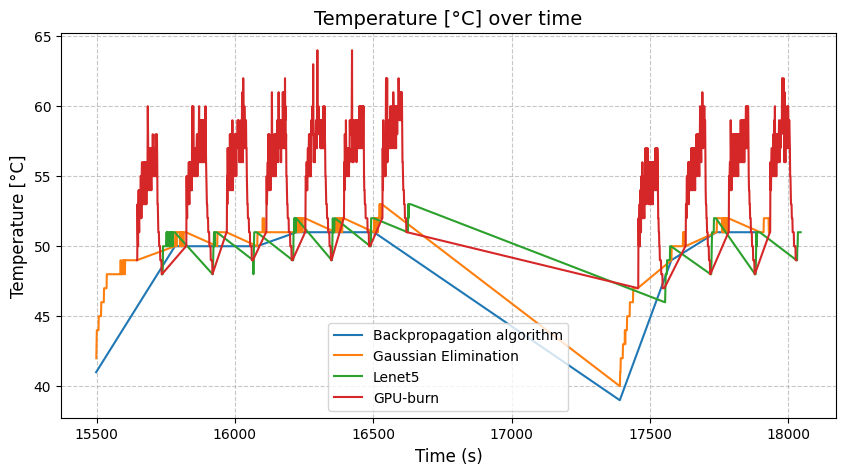

['Backpropagation algorithm' 'Gaussian Elimination' 'GPU-burn' 'Lenet5']


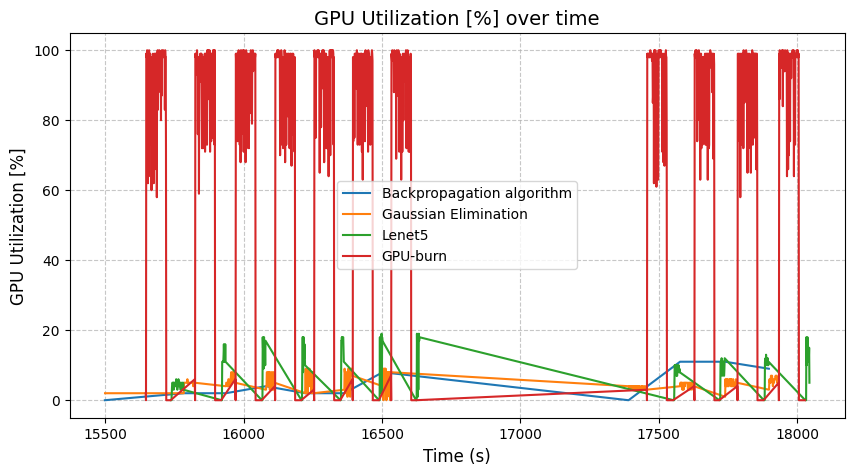

['Backpropagation algorithm' 'Gaussian Elimination' 'GPU-burn' 'Lenet5']


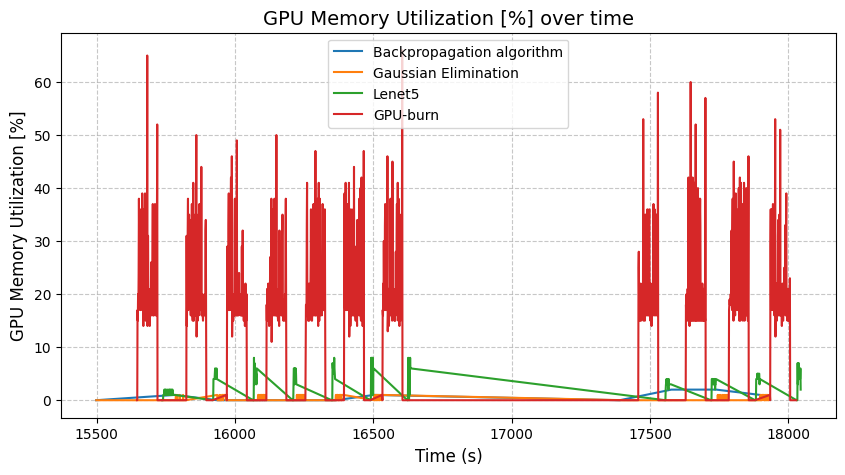

['Backpropagation algorithm' 'Gaussian Elimination' 'GPU-burn' 'Lenet5']


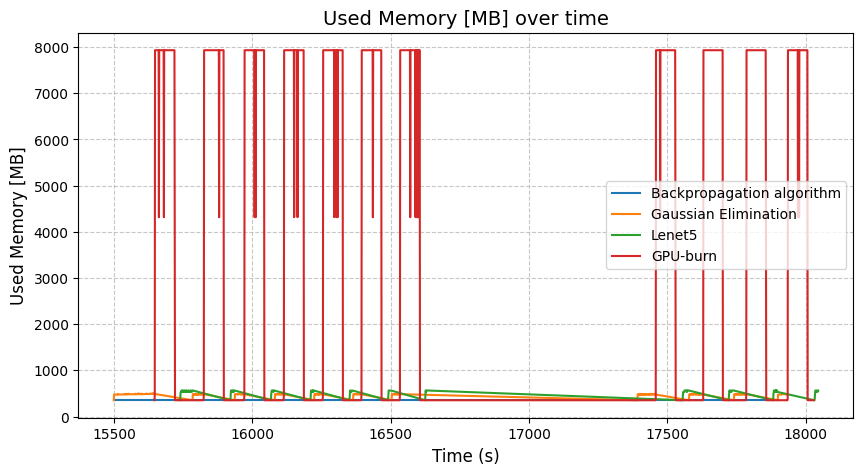

['Backpropagation algorithm' 'Gaussian Elimination' 'GPU-burn' 'Lenet5']


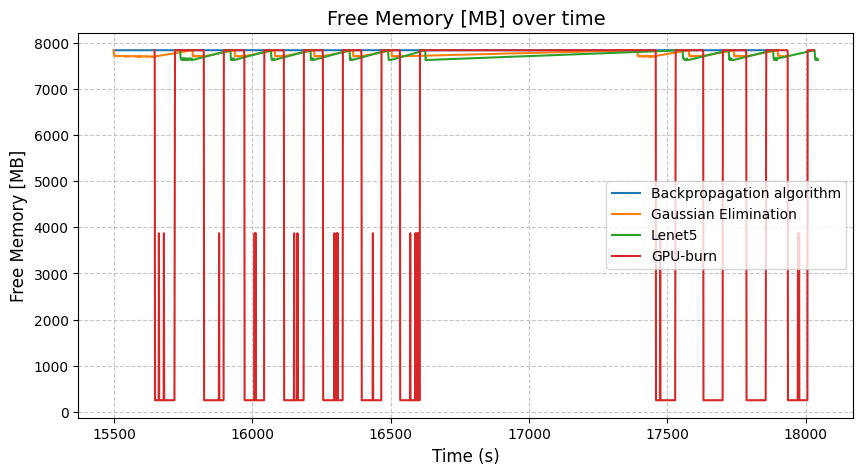

['Backpropagation algorithm' 'Gaussian Elimination' 'GPU-burn' 'Lenet5']


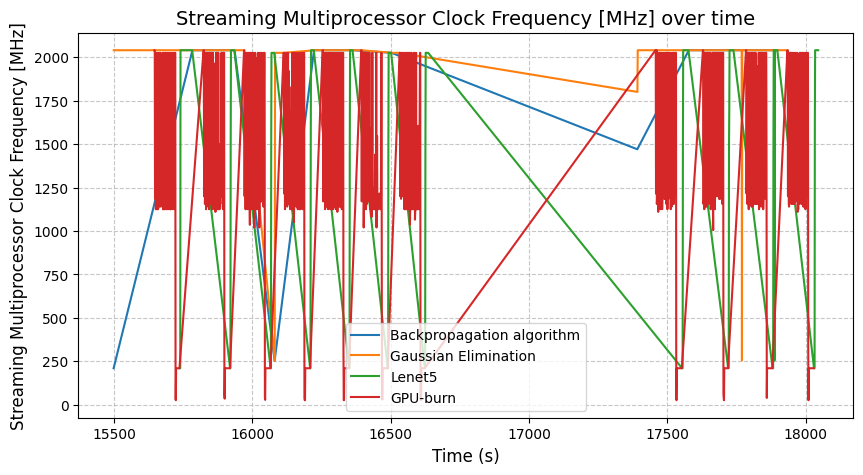

['Backpropagation algorithm' 'Gaussian Elimination' 'GPU-burn' 'Lenet5']


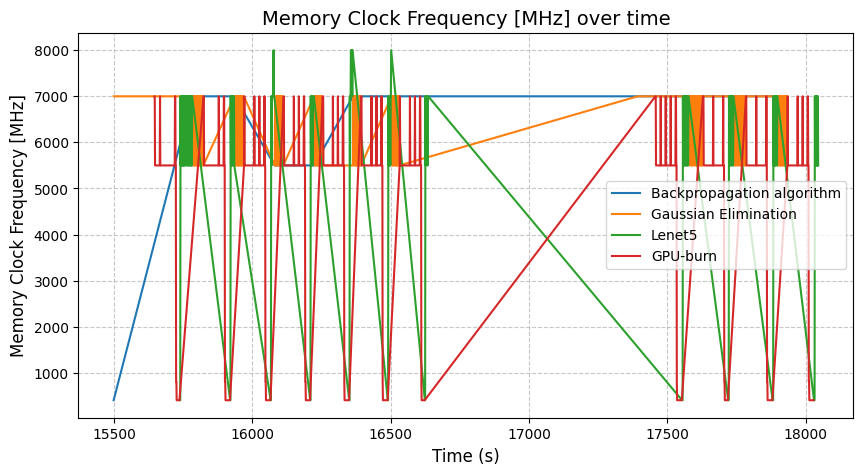

['Backpropagation algorithm' 'Gaussian Elimination' 'GPU-burn' 'Lenet5']


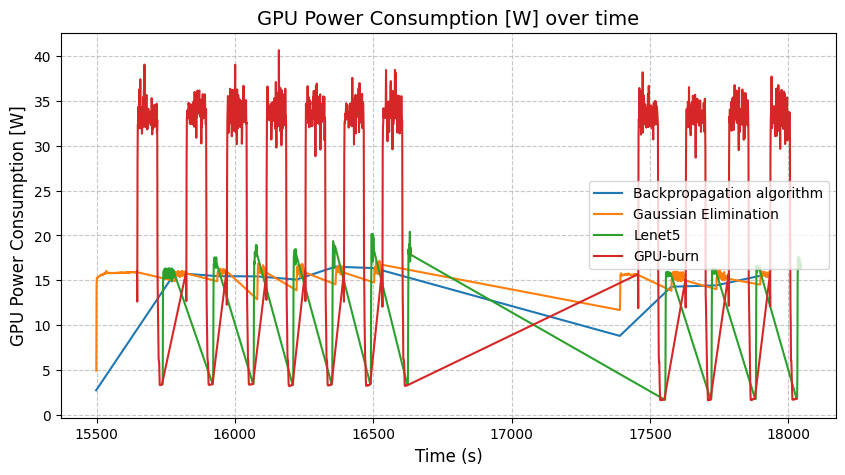

In [68]:
for column in metrics_map.values():
    plot_gpu_metric(data_sheet, column)

### To me it seems that the application is run at maximum 7 times to satisfy experimental conditions

In [83]:
hue_order = ['Backpropagation algorithm', 'Gaussian Elimination', 'Lenet5', 'GPU-burn']
def plot_gpu_metric(df, range_lab):
    data = df[df['Range']==range_lab]
    # data['timestamp_s'] = data['timestamp_ns'] / 1e9
    # data['timestamp_s'] = data.groupby('App_name')['timestamp_s'].diff()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=data, x='timestamp_s', y='Temperature [°C]', ax=ax, hue='App_name', hue_order=hue_order)
    ax.set_title(f'Temperature [°C] over time for range = {range_lab}', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Temperature [°C]', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    # ax.set_xlim(right=5000)
    plt.show()

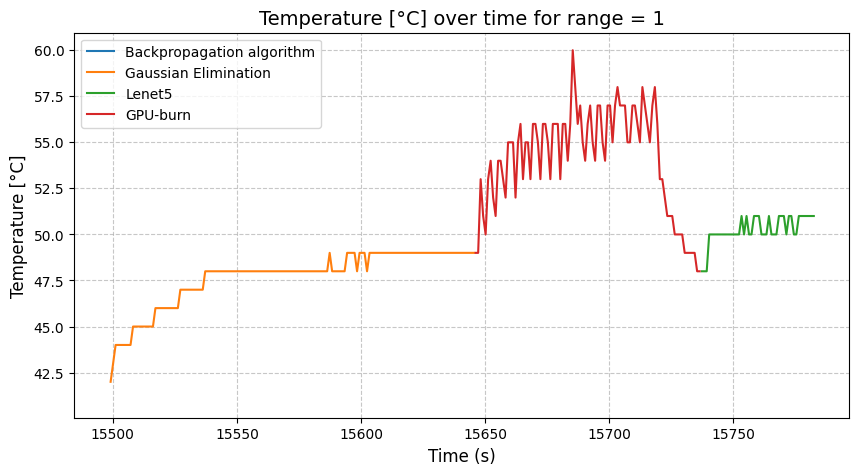

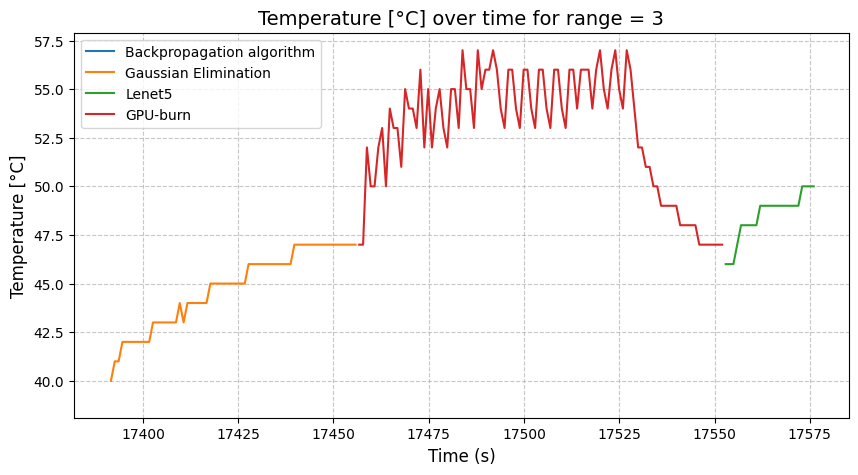

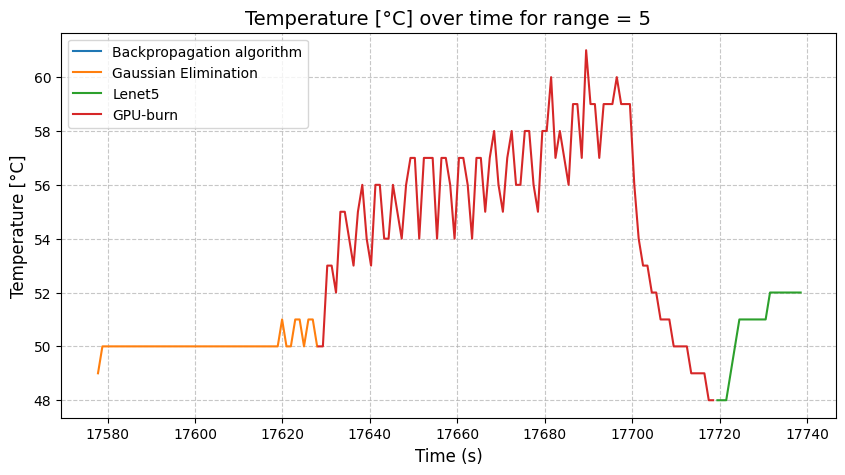

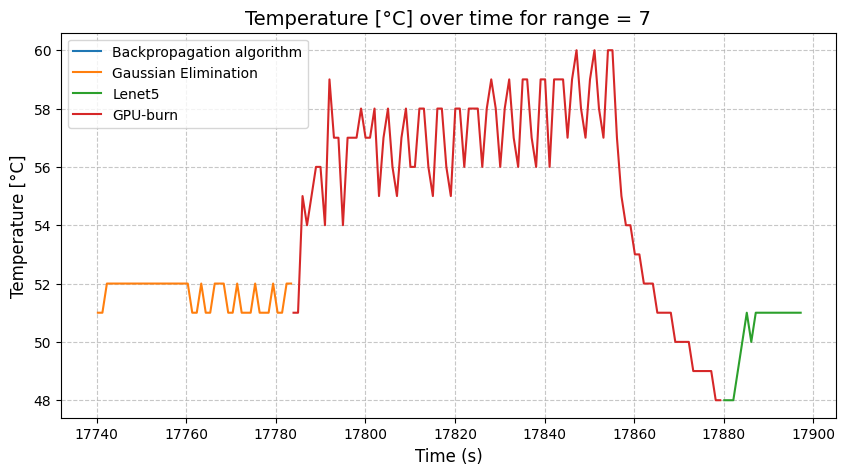

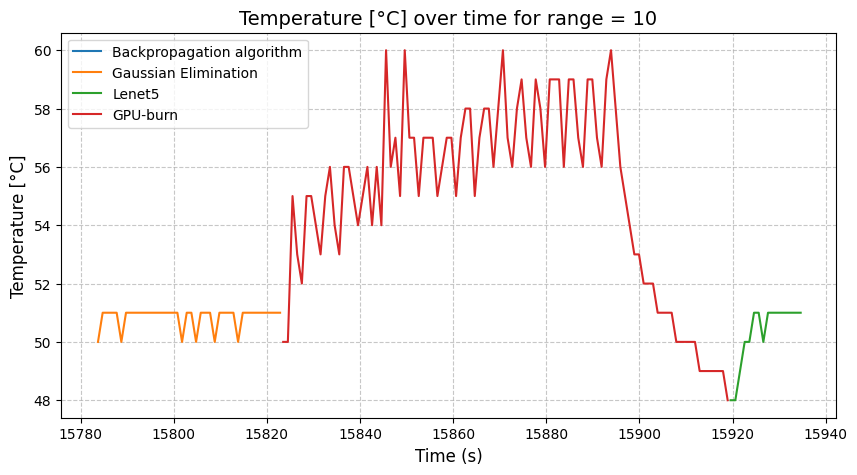

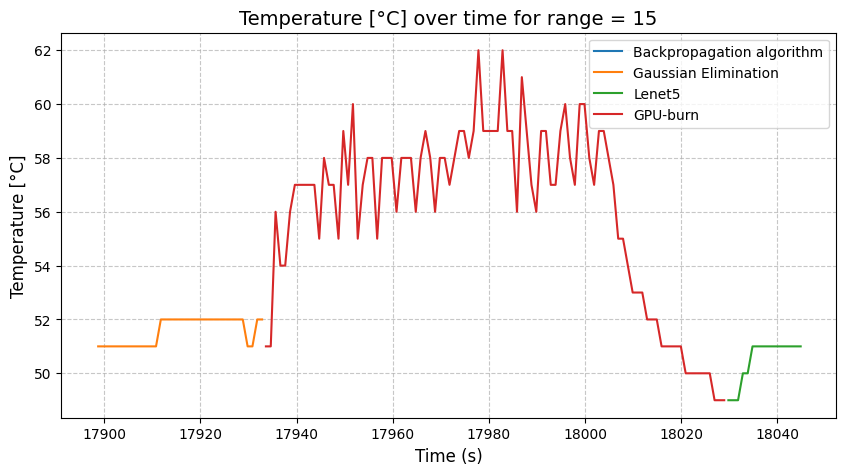

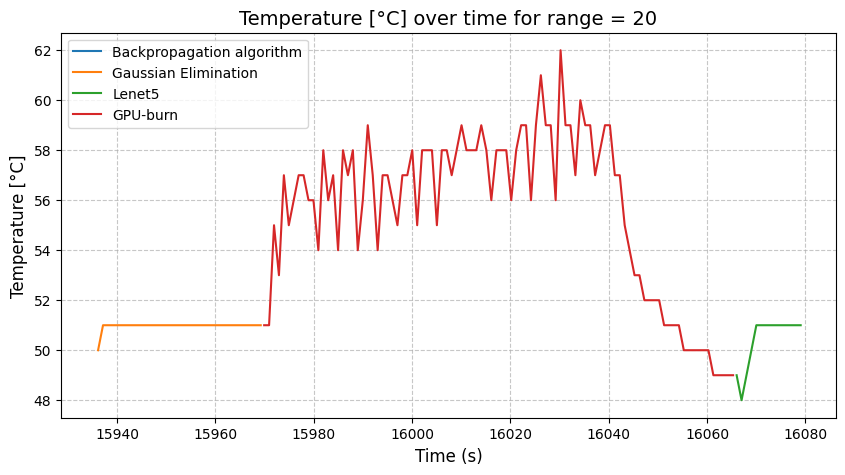

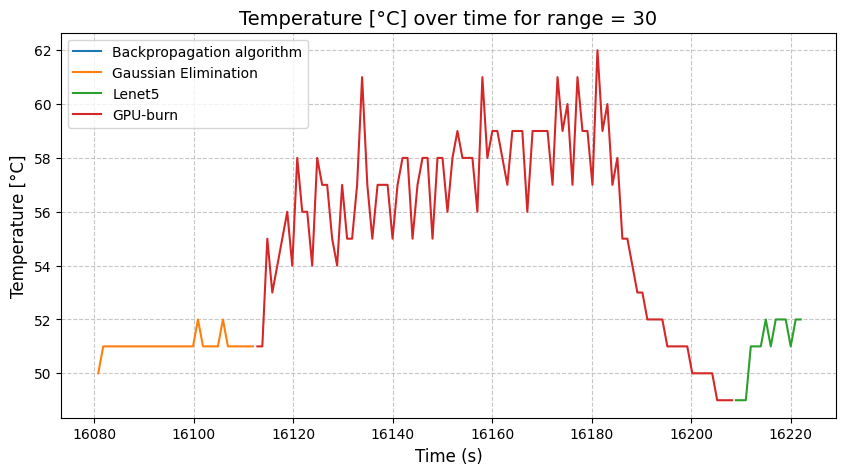

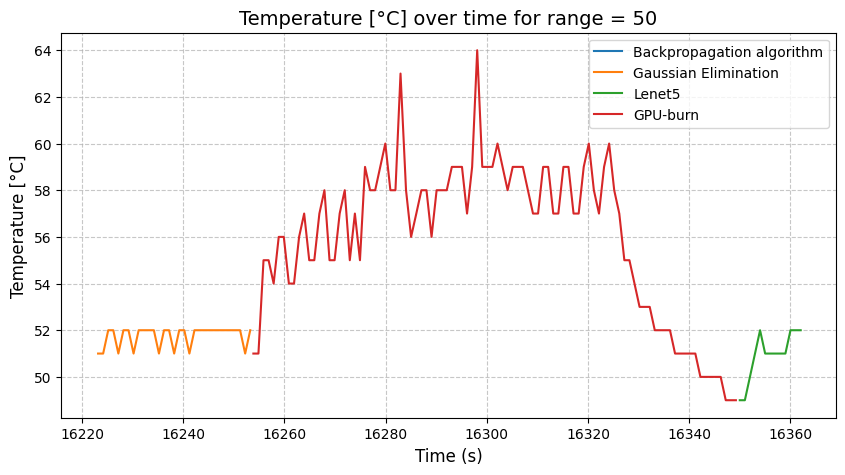

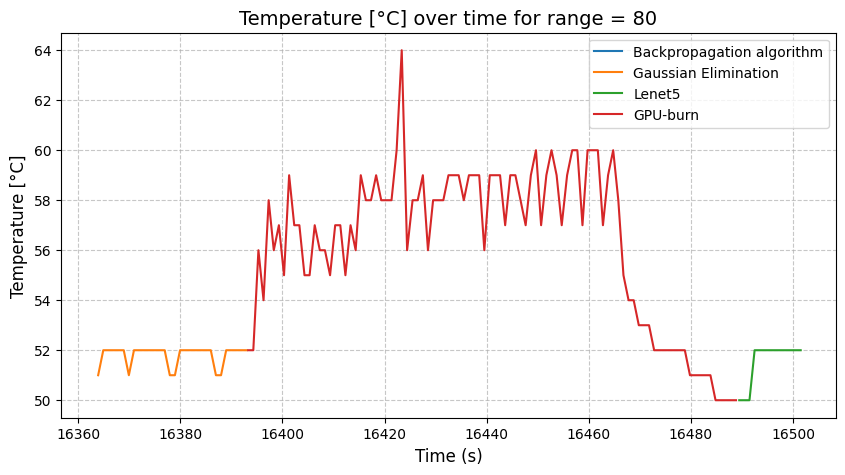

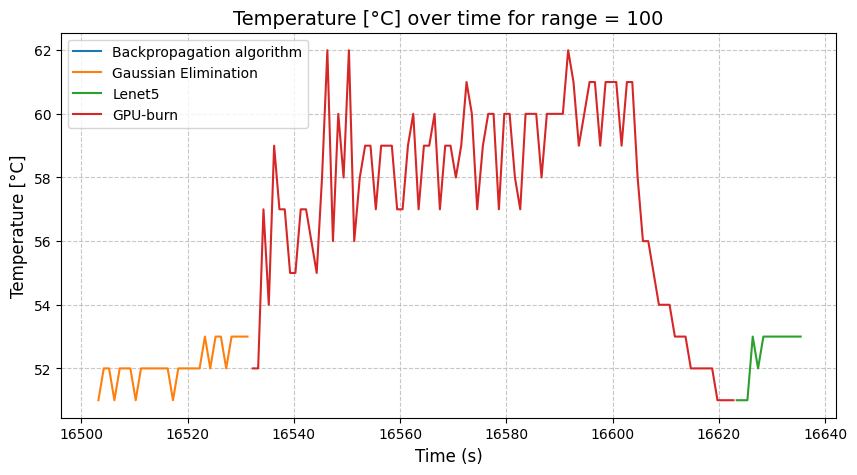

In [84]:
for range_lab in sorted(data_sheet['Range'].unique()):
    plot_gpu_metric(data_sheet, range_lab)